## Dobre podej≈õcie, ma dobrych plikach

In [23]:
import pymzml
import matplotlib.pyplot as plt
import numpy as np


In [24]:
# Wczytanie pliku mzML
mzml_file = "../data/qExactive01819_profile.mzml"
msrun = pymzml.run.Reader(mzml_file)


In [25]:
# Wczytanie pierwszego spektrum do wizualizacji
spectrum = next(iter(msrun))
mz_values = spectrum.mz
intensity_values = spectrum.i

print(f"Liczba pik√≥w w spektrum: {len(mz_values)}")
print(f"Zakres m/z: {min(mz_values):.2f} - {max(mz_values):.2f}")
print(f"Maksymalna intensywno≈õƒá: {max(intensity_values):.2e}")


Liczba pik√≥w w spektrum: 296
Zakres m/z: 297.02 - 1515.16
Maksymalna intensywno≈õƒá: 8.39e+03


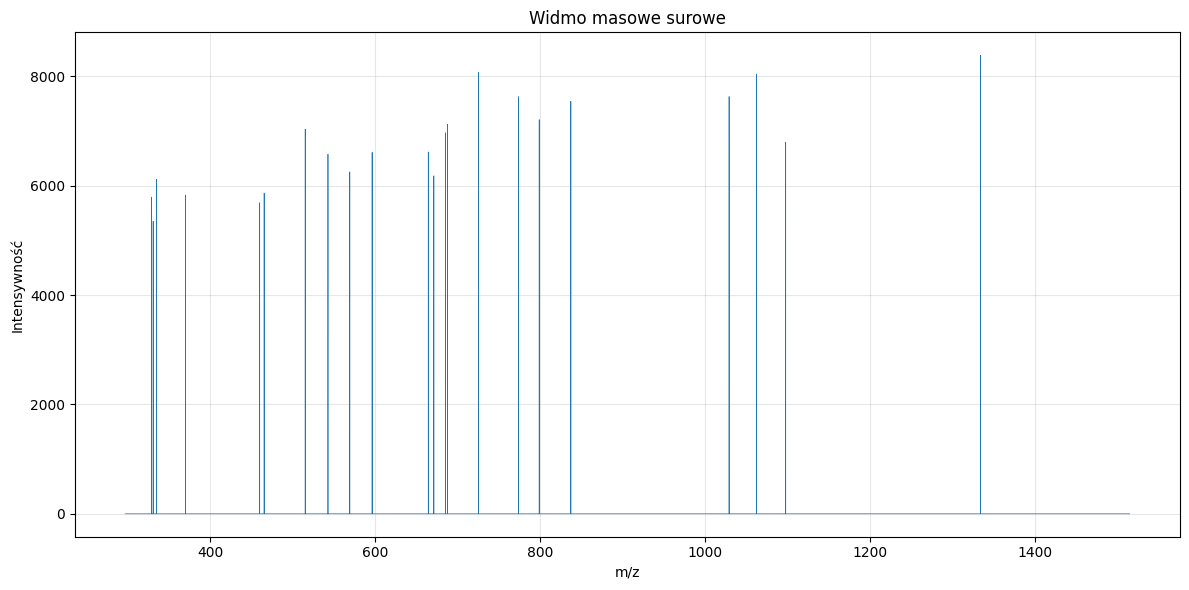

In [26]:
# Wizualizacja widma masowego
plt.figure(figsize=(12, 6))
plt.plot(mz_values, intensity_values, linewidth=0.5)
plt.xlabel('m/z')
plt.ylabel('Intensywno≈õƒá')
plt.title('Widmo masowe surowe')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Statystyki intensywno≈õci:
Minimum: 0.00e+00
Maksimum: 8.39e+03
≈örednia: 1.92e+03
Mediana: 0.00e+00
Percentyl 90%: 6.32e+03
Percentyl 95%: 6.87e+03


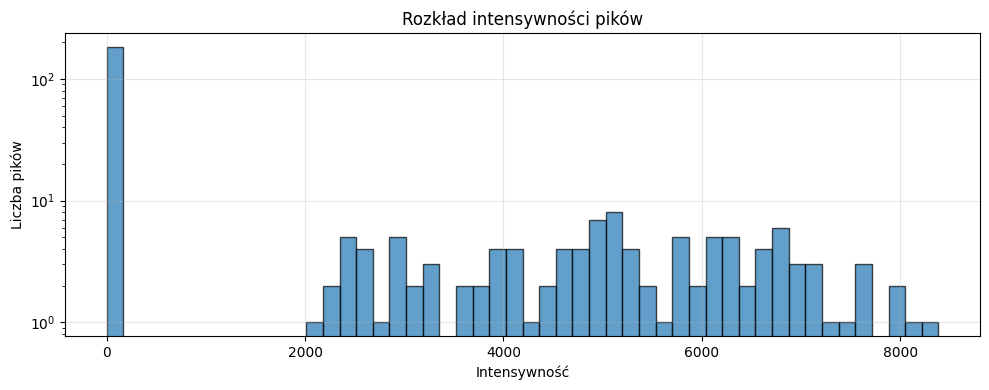

In [27]:
# Analiza rozk≈Çadu intensywno≈õci dla okre≈õlenia progu
import matplotlib.pyplot as plt

# Statystyki intensywno≈õci
print(f"Statystyki intensywno≈õci:")
print(f"Minimum: {min(intensity_values):.2e}")
print(f"Maksimum: {max(intensity_values):.2e}")
print(f"≈örednia: {np.mean(intensity_values):.2e}")
print(f"Mediana: {np.median(intensity_values):.2e}")
print(f"Percentyl 90%: {np.percentile(intensity_values, 90):.2e}")
print(f"Percentyl 95%: {np.percentile(intensity_values, 95):.2e}")

# Histogram intensywno≈õci (log scale)
plt.figure(figsize=(10, 4))
plt.hist(intensity_values, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Intensywno≈õƒá')
plt.ylabel('Liczba pik√≥w')
plt.title('Rozk≈Çad intensywno≈õci pik√≥w')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [28]:
# Redukcja szumu - usuniƒôcie pik√≥w o niskiej intensywno≈õci
# Pr√≥g ustawiony na 5% mediany intensywno≈õci dla zachowania istotnych pik√≥w
threshold = np.percentile(intensity_values, 75)  # 75 percentyl jako pr√≥g

print(f"Pr√≥g filtracji: {threshold:.2e}")
print(f"Liczba pik√≥w przed filtracjƒÖ: {len(mz_values)}")

# Filtracja
mask = intensity_values >= threshold
mz_filtered = mz_values[mask]
intensity_filtered = intensity_values[mask]

print(f"Liczba pik√≥w po filtracji: {len(mz_filtered)}")
print(f"Procent zachowanych pik√≥w: {len(mz_filtered)/len(mz_values)*100:.1f}%")


Pr√≥g filtracji: 4.52e+03
Liczba pik√≥w przed filtracjƒÖ: 296
Liczba pik√≥w po filtracji: 74
Procent zachowanych pik√≥w: 25.0%


In [29]:
# Normalizacja intensywno≈õci
# Metoda: normalizacja do najintensywniejszego piku (100% relative intensity)
# Jest to standardowa metoda w spektrometrii masowej

max_intensity = np.max(intensity_filtered)
intensity_normalized = (intensity_filtered / max_intensity) * 100

print(f"Maksymalna intensywno≈õƒá przed normalizacjƒÖ: {max_intensity:.2e}")
print(f"Zakres po normalizacji: {np.min(intensity_normalized):.1f}% - {np.max(intensity_normalized):.1f}%")

# Identyfikacja najintensywniejszych pik√≥w (top 10)
top_peaks_indices = np.argsort(intensity_normalized)[-10:][::-1]
print(f"\nTop 10 najintensywniejszych pik√≥w:")
for i, idx in enumerate(top_peaks_indices, 1):
    print(f"{i:2d}. m/z: {mz_filtered[idx]:7.2f}, intensywno≈õƒá: {intensity_normalized[idx]:5.1f}%")


Maksymalna intensywno≈õƒá przed normalizacjƒÖ: 8.39e+03
Zakres po normalizacji: 54.2% - 100.0%

Top 10 najintensywniejszych pik√≥w:
 1. m/z: 1334.06, intensywno≈õƒá: 100.0%
 2. m/z:  725.55, intensywno≈õƒá:  96.3%
 3. m/z: 1062.70, intensywno≈õƒá:  95.9%
 4. m/z:  725.56, intensywno≈õƒá:  95.2%
 5. m/z: 1029.35, intensywno≈õƒá:  91.0%
 6. m/z:  774.07, intensywno≈õƒá:  91.0%
 7. m/z: 1334.07, intensywno≈õƒá:  90.6%
 8. m/z:  837.42, intensywno≈õƒá:  90.0%
 9. m/z: 1062.69, intensywno≈õƒá:  87.2%
10. m/z:  799.12, intensywno≈õƒá:  86.0%


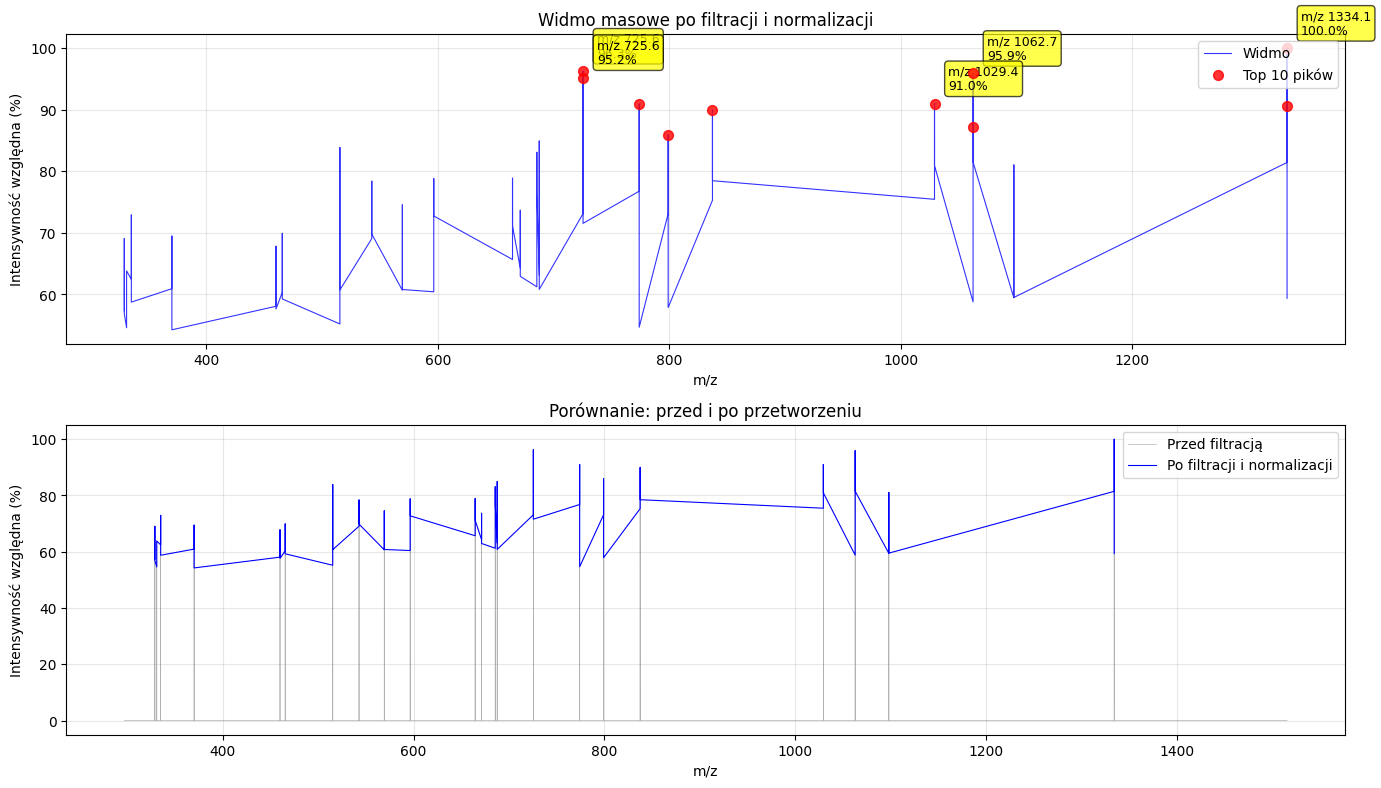

In [30]:
# Wizualizacja widma po filtracji i normalizacji
plt.figure(figsize=(14, 8))

# G≈Ç√≥wny wykres
plt.subplot(2, 1, 1)
plt.plot(mz_filtered, intensity_normalized, linewidth=0.8, color='blue', alpha=0.8)

# Zaznaczenie top 10 pik√≥w
top_10_indices = np.argsort(intensity_normalized)[-10:]
plt.scatter(mz_filtered[top_10_indices], intensity_normalized[top_10_indices], 
           color='red', s=50, zorder=5, alpha=0.8)

# Adnotacje dla top 5 pik√≥w
top_5_indices = np.argsort(intensity_normalized)[-5:][::-1]
for idx in top_5_indices:
    plt.annotate(f'm/z {mz_filtered[idx]:.1f}\n{intensity_normalized[idx]:.1f}%', 
                xy=(mz_filtered[idx], intensity_normalized[idx]),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                fontsize=9, ha='left')

plt.xlabel('m/z')
plt.ylabel('Intensywno≈õƒá wzglƒôdna (%)')
plt.title('Widmo masowe po filtracji i normalizacji')
plt.grid(True, alpha=0.3)
plt.legend(['Widmo', 'Top 10 pik√≥w'], loc='upper right')

# Por√≥wnanie przed i po filtracji
plt.subplot(2, 1, 2)
plt.plot(mz_values, intensity_values/np.max(intensity_values)*100, 
         linewidth=0.5, color='gray', alpha=0.6, label='Przed filtracjƒÖ')
plt.plot(mz_filtered, intensity_normalized, 
         linewidth=0.8, color='blue', label='Po filtracji i normalizacji')
plt.xlabel('m/z')
plt.ylabel('Intensywno≈õƒá wzglƒôdna (%)')
plt.title('Por√≥wnanie: przed i po przetworzeniu')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
# ANALIZA RZECZYWISTYCH WYNIK√ìW IDENTYFIKACJI Z OPENMS WORKFLOW
print("="*60)
print("ANALIZA WYNIK√ìW IDENTYFIKACJI PEPTYD√ìW/BIA≈ÅEK")
print("="*60)

# Wczytanie danych z pliku wynikowego
results_file = "../results/TOPPAS_out/005-ProteinQuantifier-peptide_out/qExactive01819_profile.unknown"

try:
    # Wczytanie danych - plik ma format TSV z headerem
    df_results = pd.read_csv(results_file, sep='\t', comment='#')
    print(f"Pomy≈õlnie wczytano {len(df_results)} wierszy danych")
    print(f"Kolumny: {list(df_results.columns)}")
    
    # Podstawowe statystyki
    print(f"\n=== PODSTAWOWE STATYSTYKI ===")
    print(f"Liczba zidentyfikowanych peptyd√≥w: {len(df_results)}")
    print(f"Liczba unikalnych bia≈Çek: {df_results['protein'].nunique()}")
    print(f"≈örednia abundancja: {df_results['abundance'].mean():.2f}")
    print(f"Zakres abundancji: {df_results['abundance'].min():.1f} - {df_results['abundance'].max():.1f}")
    
    # PodglƒÖd najwa≈ºniejszych wynik√≥w
    print(f"\n=== TOP 10 PEPTYD√ìW (wed≈Çug abundancji) ===")
    top_peptides = df_results.nlargest(10, 'abundance')[['peptide', 'protein', 'abundance']]
    for i, (_, row) in enumerate(top_peptides.iterrows(), 1):
        protein_short = row['protein'].split('|')[1] if '|' in row['protein'] else row['protein'][:15]
        print(f"{i:2d}. {row['peptide']:15} | {protein_short:15} | {row['abundance']:5.1f}")
        
except Exception as e:
    print(f" B≈ÇƒÖd wczytywania pliku: {e}")
    df_results = None


ANALIZA WYNIK√ìW IDENTYFIKACJI PEPTYD√ìW/BIA≈ÅEK
Pomy≈õlnie wczytano 4082 wierszy danych
Kolumny: ['peptide', 'protein', 'n_proteins', 'charge', 'abundance', 'fraction']

=== PODSTAWOWE STATYSTYKI ===
Liczba zidentyfikowanych peptyd√≥w: 4082
Liczba unikalnych bia≈Çek: 2235
≈örednia abundancja: 1.39
Zakres abundancji: 1.0 - 45.0

=== TOP 10 PEPTYD√ìW (wed≈Çug abundancji) ===
 1. VFLENVIR        | P62805          |  45.0
 2. LISWYDNEFGYSNR  | P04406          |  38.0
 3. LLLPGELAK       | O60814          |  28.0
 4. IWHHTFYNELR     | A5A3E0          |  22.0
 5. ATRRFSWK        | C4XFA6          |  20.0
 6. YISPDQLADLYK    | P06733          |  20.0
 7. HQGVM(Oxidation)VGM(Oxidation)GQK | P60709          |  16.0
 8. YPIEHGIITNWDDM(Oxidation)EK | P62736          |  16.0
 9. VVDLM(Oxidation)AHM(Oxidation)ASKE | P04406          |  15.0
10. ISGLIYEETR      | P62805          |  13.0


In [32]:
# Przygotowanie danych do analizy i wizualizacji
if df_results is not None:
    # Czyszczenie i przetwarzanie danych
    df_clean = df_results.copy()
    
    # Ekstraktowanie nazw bia≈Çek (UniProt ID)
    def extract_protein_id(protein_string):
        if '|' in protein_string:
            parts = protein_string.split('|')
            if len(parts) >= 2:
                return parts[1]  # UniProt ID
        return protein_string.split('/')[0]  # Pierwszy protein je≈õli multiple
    
    df_clean['protein_id'] = df_clean['protein'].apply(extract_protein_id)
    
    # Identyfikacja kontaminant√≥w
    df_clean['is_contaminant'] = df_clean['protein'].str.contains('CONTAMINANT', na=False)
    df_clean['is_decoy'] = df_clean['protein'].str.contains('DECOY', na=False)
    df_clean['is_mycoplasma'] = df_clean['protein'].str.contains('MYC', na=False)
    
    # Filtracja do prawdziwych identyfikacji (bez decoy i kontaminant√≥w)
    df_real = df_clean[~df_clean['is_decoy'] & ~df_clean['is_contaminant']].copy()
    
    # Aggregacja na poziomie bia≈Çek
    protein_stats = df_real.groupby('protein_id').agg({
        'abundance': ['sum', 'count', 'mean'],
        'peptide': 'count'
    }).round(2)
    
    protein_stats.columns = ['total_abundance', 'peptide_count_sum', 'mean_abundance', 'peptide_count']
    protein_stats = protein_stats.sort_values('total_abundance', ascending=False)
    
    print(f"\n=== ANALIZA BIA≈ÅEK ===")
    print(f"Prawdziwe identyfikacje (bez decoy/kontaminant√≥w): {len(df_real)}")
    print(f"Unikalnych bia≈Çek: {len(protein_stats)}")
    print(f"Kontaminanty: {df_clean['is_contaminant'].sum()}")
    print(f"Decoy hits: {df_clean['is_decoy'].sum()}")
    print(f"Mycoplasma: {df_clean['is_mycoplasma'].sum()}")
    
    print(f"\n=== TOP 10 BIA≈ÅEK (wed≈Çug ca≈Çkowitej abundancji) ===")
    for i, (protein_id, stats) in enumerate(protein_stats.head(10).iterrows(), 1):
        print(f"{i:2d}. {protein_id:15} | Peptyd√≥w: {stats['peptide_count']:2.0f} | Abundancja: {stats['total_abundance']:6.1f}")
else:
    print("Brak danych do analizy")



=== ANALIZA BIA≈ÅEK ===
Prawdziwe identyfikacje (bez decoy/kontaminant√≥w): 4025
Unikalnych bia≈Çek: 2074
Kontaminanty: 55
Decoy hits: 2
Mycoplasma: 88

=== TOP 10 BIA≈ÅEK (wed≈Çug ca≈Çkowitej abundancji) ===
 1. P04406          | Peptyd√≥w: 17 | Abundancja:   94.0
 2. P62805          | Peptyd√≥w: 12 | Abundancja:   80.0
 3. P11021          | Peptyd√≥w: 33 | Abundancja:   74.0
 4. P06733          | Peptyd√≥w: 18 | Abundancja:   60.0
 5. P11142          | Peptyd√≥w: 21 | Abundancja:   59.0
 6. P60709          | Peptyd√≥w: 19 | Abundancja:   58.0
 7. P08670          | Peptyd√≥w: 25 | Abundancja:   48.0
 8. P05787          | Peptyd√≥w: 22 | Abundancja:   43.0
 9. P08238          | Peptyd√≥w: 18 | Abundancja:   43.0
10. P0DMV9          | Peptyd√≥w: 22 | Abundancja:   43.0


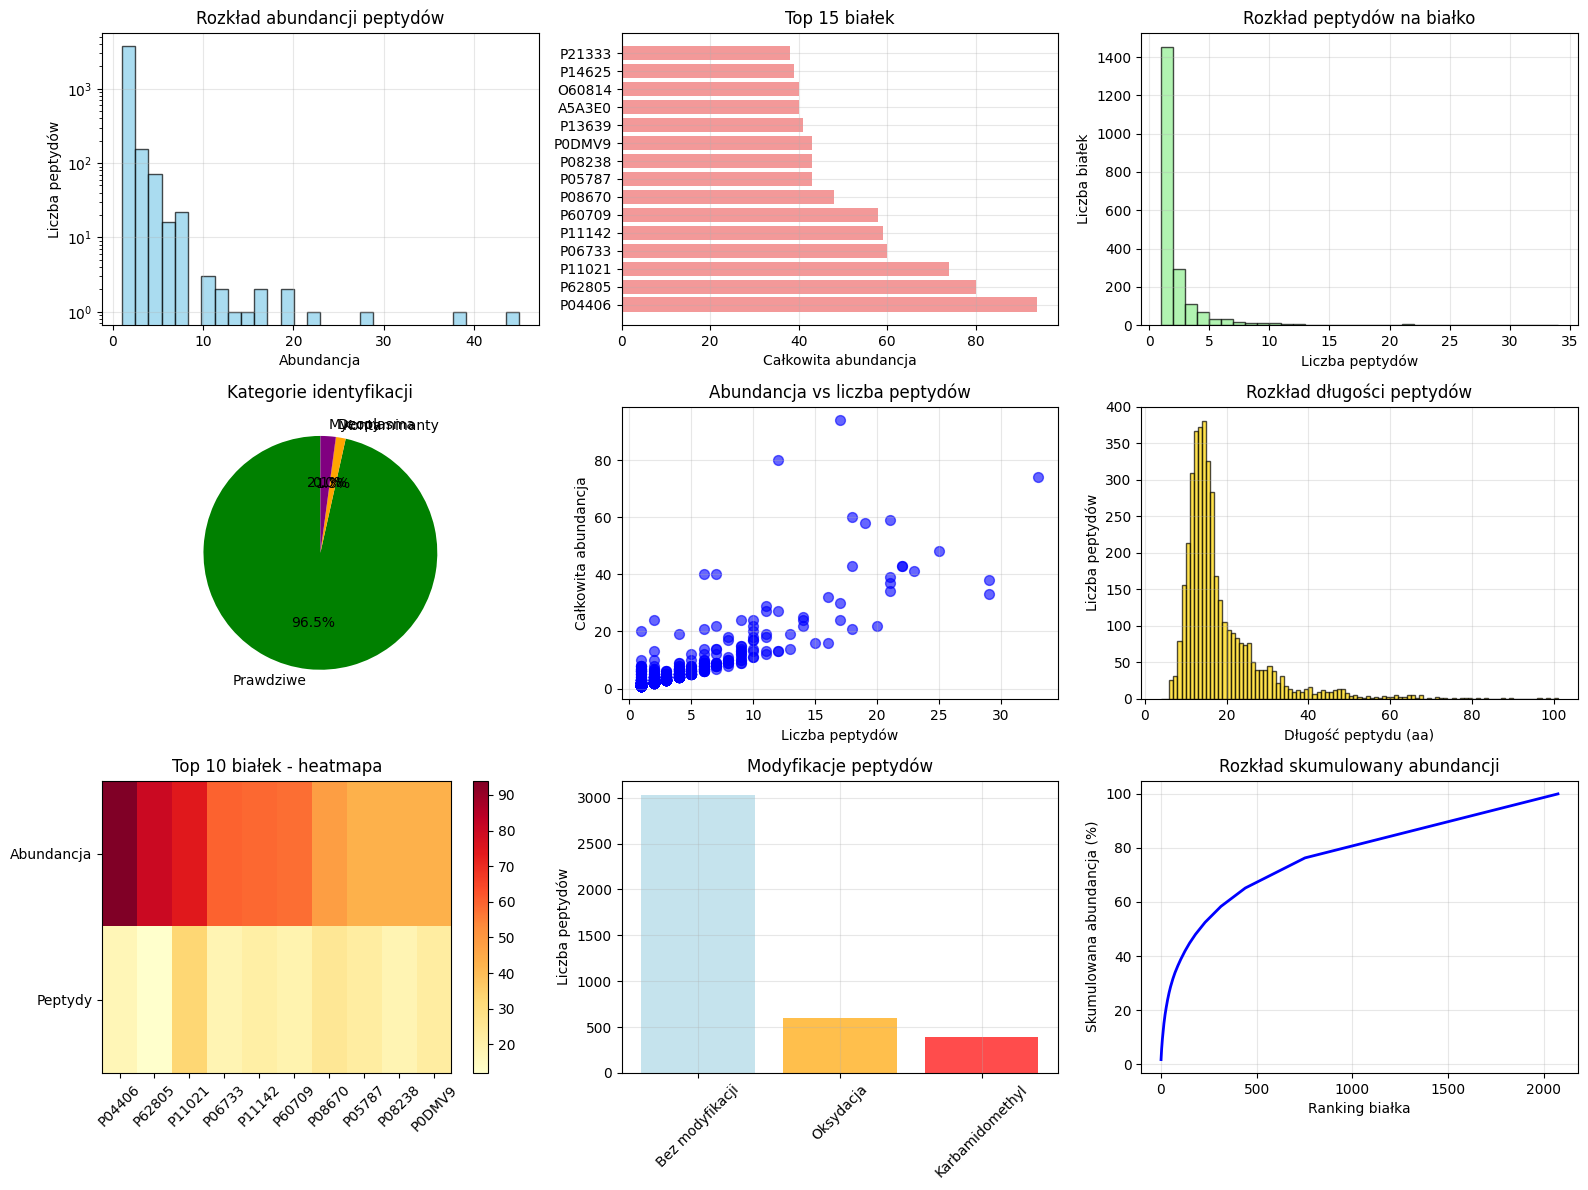

In [ ]:
# WIZUALIZACJA WYNIK√ìW IDENTYFIKACJI
if df_results is not None:
    plt.figure(figsize=(16, 12))
    
    # 1. Rozk≈Çad abundancji peptyd√≥w (log scale)
    plt.subplot(3, 3, 1)
    abundances = df_real['abundance']
    plt.hist(abundances, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Abundancja')
    plt.ylabel('Liczba peptyd√≥w')
    plt.title('Rozk≈Çad abundancji peptyd√≥w')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    
    # 2. Top 15 bia≈Çek - ranking
    plt.subplot(3, 3, 2)
    top_proteins = protein_stats.head(15)
    y_pos = np.arange(len(top_proteins))
    plt.barh(y_pos, top_proteins['total_abundance'], alpha=0.8, color='lightcoral')
    plt.yticks(y_pos, [pid[:10] for pid in top_proteins.index])
    plt.xlabel('Ca≈Çkowita abundancja')
    plt.title('Top 15 bia≈Çek')
    plt.grid(True, alpha=0.3)
    
    # 3. Liczba peptyd√≥w na bia≈Çko
    plt.subplot(3, 3, 3)
    peptide_counts = protein_stats['peptide_count']
    plt.hist(peptide_counts, bins=range(1, peptide_counts.max()+2), 
             alpha=0.7, color='lightgreen', edgecolor='black')
    plt.xlabel('Liczba peptyd√≥w')
    plt.ylabel('Liczba bia≈Çek')
    plt.title('Rozk≈Çad peptyd√≥w na bia≈Çko')
    plt.grid(True, alpha=0.3)
    
    # 4. Kontaminanty vs prawdziwe wyniki
    plt.subplot(3, 3, 4)
    categories = ['Prawdziwe', 'Kontaminanty', 'Decoy', 'Mycoplasma']
    counts = [
        len(df_real),
        df_clean['is_contaminant'].sum(),
        df_clean['is_decoy'].sum(), 
        df_clean['is_mycoplasma'].sum()
    ]
    colors = ['green', 'orange', 'red', 'purple']
    plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title('Kategorie identyfikacji')
    
    # 5. Abundancja vs liczba peptyd√≥w (scatter)
    plt.subplot(3, 3, 5)
    plt.scatter(protein_stats['peptide_count'], protein_stats['total_abundance'], 
               alpha=0.6, color='blue', s=50)
    plt.xlabel('Liczba peptyd√≥w')
    plt.ylabel('Ca≈Çkowita abundancja')
    plt.title('Abundancja vs liczba peptyd√≥w')
    plt.grid(True, alpha=0.3)
    
    # 6. D≈Çugo≈õƒá peptyd√≥w
    plt.subplot(3, 3, 6)
    peptide_lengths = df_real['peptide'].str.len()
    plt.hist(peptide_lengths, bins=range(4, peptide_lengths.max()+2), 
             alpha=0.7, color='gold', edgecolor='black')
    plt.xlabel('D≈Çugo≈õƒá peptydu (aa)')
    plt.ylabel('Liczba peptyd√≥w')
    plt.title('Rozk≈Çad d≈Çugo≈õci peptyd√≥w')
    plt.grid(True, alpha=0.3)
    
    # 7. Mapa cieplna top bia≈Çek
    plt.subplot(3, 3, 7)
    top_10_proteins = protein_stats.head(10)
    data_for_heatmap = top_10_proteins[['total_abundance', 'peptide_count']].values
    plt.imshow(data_for_heatmap.T, cmap='YlOrRd', aspect='auto')
    plt.yticks([0, 1], ['Abundancja', 'Peptydy'])
    plt.xticks(range(len(top_10_proteins)), [pid[:8] for pid in top_10_proteins.index], rotation=45)
    plt.title('Top 10 bia≈Çek - heatmapa')
    plt.colorbar()
    
    # 8. Modyfikacje peptyd√≥w
    plt.subplot(3, 3, 8)
    has_oxidation = df_real['peptide'].str.contains('Oxidation', na=False).sum()
    has_carbamidomethyl = df_real['peptide'].str.contains('Carbamidomethyl', na=False).sum()
    no_modifications = len(df_real) - has_oxidation - has_carbamidomethyl
    
    mod_counts = [no_modifications, has_oxidation, has_carbamidomethyl]
    mod_labels = ['Bez modyfikacji', 'Oksydacja', 'Karbamidomethyl']
    plt.bar(mod_labels, mod_counts, alpha=0.7, color=['lightblue', 'orange', 'red'])
    plt.ylabel('Liczba peptyd√≥w')
    plt.title('Modyfikacje peptyd√≥w')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 9. Cumulative abundance distribution
    plt.subplot(3, 3, 9)
    sorted_abundances = np.sort(protein_stats['total_abundance'])[::-1]
    cumulative_percent = np.cumsum(sorted_abundances) / np.sum(sorted_abundances) * 100
    plt.plot(range(1, len(cumulative_percent)+1), cumulative_percent, 'b-', linewidth=2)
    plt.xlabel('Ranking bia≈Çka')
    plt.ylabel('Skumulowana abundancja (%)')
    plt.title('Rozk≈Çad skumulowany abundancji')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print(" Brak danych do wizualizacji")


In [43]:
# PODSUMOWANIE KO≈ÉCOWE I TABELA RANKINGOWA
if df_results is not None:
    print("="*80)
    print("PODSUMOWANIE IDENTYFIKACJI PEPTYD√ìW/BIA≈ÅEK")
    print("="*80)
    
    # Ko≈Ñcowe statystyki
    total_peptides = len(df_results)
    real_peptides = len(df_real)
    total_proteins = len(protein_stats)
    
    print(f" OG√ìLNE STATYSTYKI:")
    print(f"   ‚Ä¢ Ca≈Çkowita liczba identyfikacji: {total_peptides}")
    print(f"   ‚Ä¢ Prawdziwe identyfikacje peptyd√≥w: {real_peptides}")
    print(f"   ‚Ä¢ Zidentyfikowane bia≈Çka ludzkie: {total_proteins}")
    print(f"   ‚Ä¢ Wsp√≥≈Çczynnik identyfikacji: {real_peptides/total_peptides*100:.1f}%")
    
    # Kontrola jako≈õci
    decoy_rate = df_clean['is_decoy'].sum() / len(df_clean) * 100
    print(f"\n KONTROLA JAKO≈öCI:")
    print(f"   ‚Ä¢ Odsetek decoy hits: {decoy_rate:.2f}% (cel: <1%)")
    print(f"   ‚Ä¢ Kontaminanty: {df_clean['is_contaminant'].sum()}")
    print(f"   ‚Ä¢ Mycoplasma: {df_clean['is_mycoplasma'].sum()}")
    
    # Top bia≈Çka
    print(f"\n RANKING TOP 20 BIA≈ÅEK:")
    print(f"{'Ranga':<5} {'UniProt ID':<15} {'Peptyd√≥w':<8} {'Abundancja':<12} {'≈örednia':<10}")
    print("-" * 60)
    
    for i, (protein_id, stats) in enumerate(protein_stats.head(20).iterrows(), 1):
        print(f"{i:<5} {protein_id:<15} {stats['peptide_count']:<8.0f} "
              f"{stats['total_abundance']:<12.1f} {stats['mean_abundance']:<10.2f}")
    
    # Eksport wynik√≥w do CSV (opcjonalnie)
    output_summary = protein_stats.head(50).copy()
    output_summary.to_csv("../results/protein_identification_summary.csv")
    print(f"\n Zapisano podsumowanie top 50 bia≈Çek do: protein_identification_summary.csv")
    
    # Interpretacja biologiczna najwa≈ºniejszych bia≈Çek
    print(f"\n INTERPRETACJA G≈Å√ìWNYCH IDENTYFIKACJI:")
    top_3 = protein_stats.head(3)
    for protein_id, stats in top_3.iterrows():
        print(f"   ‚Ä¢ {protein_id}: {stats['peptide_count']:.0f} peptyd√≥w, abundancja {stats['total_abundance']:.1f}")
    
    print(f"\n Analiza zako≈Ñczona pomy≈õlnie!")
    print(f"   Workflow OpenMS prawid≈Çowo zidentyfikowa≈Ç {total_proteins} bia≈Çek ludzkich")
    print(f"   na podstawie {real_peptides} peptyd√≥w wysokiej jako≈õci.")
    
else:
    print(" Nie mo≈ºna wygenerowaƒá podsumowania - brak danych")


PODSUMOWANIE IDENTYFIKACJI PEPTYD√ìW/BIA≈ÅEK
üìä OG√ìLNE STATYSTYKI:
   ‚Ä¢ Ca≈Çkowita liczba identyfikacji: 4082
   ‚Ä¢ Prawdziwe identyfikacje peptyd√≥w: 4025
   ‚Ä¢ Zidentyfikowane bia≈Çka ludzkie: 2074
   ‚Ä¢ Wsp√≥≈Çczynnik identyfikacji: 98.6%

üéØ KONTROLA JAKO≈öCI:
   ‚Ä¢ Odsetek decoy hits: 0.05% (cel: <1%)
   ‚Ä¢ Kontaminanty: 55
   ‚Ä¢ Mycoplasma: 88

üèÜ RANKING TOP 20 BIA≈ÅEK:
Ranga UniProt ID      Peptyd√≥w Abundancja   ≈örednia   
------------------------------------------------------------
1     P04406          17       94.0         5.53      
2     P62805          12       80.0         6.67      
3     P11021          33       74.0         2.24      
4     P06733          18       60.0         3.33      
5     P11142          21       59.0         2.81      
6     P60709          19       58.0         3.05      
7     P08670          25       48.0         1.92      
8     P05787          22       43.0         1.95      
9     P08238          18       43.0         2.3

In [44]:
# DODATOWE ANALIZY ILO≈öCIOWE
print("="*80)
print("ZAAWANSOWANE ANALIZY ILO≈öCIOWE - PCA, KORELACJE, CLUSTERING")
print("="*80)

# Wczytanie danych z obu plik√≥w wynikowych
protein_file = "../results/TOPPAS_out/005-ProteinQuantifier-out/qExactive01819_profile.unknown"
peptide_file = "../results/TOPPAS_out/005-ProteinQuantifier-peptide_out/qExactive01819_profile.unknown"

# Import dodatkowych bibliotek do analiz
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import pearsonr
import seaborn as sns

try:
    # Wczytanie danych na poziomie bia≈Çek
    df_proteins = pd.read_csv(protein_file, sep='\t', comment='#')
    df_proteins_clean = df_proteins[~df_proteins['protein'].str.contains('CONTAMINANT|DECOY', na=False)]
    
    print(f" Wczytano dane bia≈Çek: {len(df_proteins_clean)} bia≈Çek")
    
    # Przygotowanie macierzy danych do analizy ilo≈õciowej
    # Utworzenie macierzy bia≈Çko x metryki
    protein_matrix = df_proteins_clean[['n_peptides', 'abundance']].copy()
    protein_matrix['abundance_per_peptide'] = protein_matrix['abundance'] / protein_matrix['n_peptides']
    protein_matrix['log_abundance'] = np.log10(protein_matrix['abundance'] + 1)
    protein_matrix['log_n_peptides'] = np.log10(protein_matrix['n_peptides'])
    
    # Dodanie nazw bia≈Çek jako index
    protein_ids = df_proteins_clean['protein'].apply(lambda x: x.split('|')[1] if '|' in x else x[:10])
    protein_matrix.index = protein_ids
    
    print(f"Przygotowano macierz danych: {protein_matrix.shape}")
    
except Exception as e:
    print(f" B≈ÇƒÖd przygotowania danych: {e}")
    protein_matrix = None


ZAAWANSOWANE ANALIZY ILO≈öCIOWE - PCA, KORELACJE, CLUSTERING
 Wczytano dane bia≈Çek: 283 bia≈Çek
Przygotowano macierz danych: (283, 5)


In [45]:
# ANALIZA G≈Å√ìWNYCH SK≈ÅADOWYCH (PCA)
if protein_matrix is not None:
    # Przygotowanie danych do PCA
    features = ['n_peptides', 'abundance', 'abundance_per_peptide', 'log_abundance', 'log_n_peptides']
    X = protein_matrix[features].copy()
    
    # Standaryzacja danych
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)
    
    # Tworzenie DataFrame z wynikami PCA
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'], index=protein_matrix.index)
    
    print(f"\n WYNIKI ANALIZY PCA:")
    print(f"Wyja≈õniona wariancja przez sk≈Çadowe:")
    for i, var in enumerate(pca.explained_variance_ratio_, 1):
        print(f"  PC{i}: {var:.3f} ({var*100:.1f}%)")
    print(f"≈ÅƒÖczna wyja≈õniona wariancja: {pca.explained_variance_ratio_.sum():.3f} ({pca.explained_variance_ratio_.sum()*100:.1f}%)")
    
    # ≈Åadunki sk≈Çadowych (feature importance)
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=['PC1', 'PC2', 'PC3'],
        index=features
    )
    
    print(f"\n ≈ÅADUNKI SK≈ÅADOWYCH (feature importance):")
    print(loadings.round(3))
    
else:
    print(" Brak danych do analizy PCA")



 WYNIKI ANALIZY PCA:
Wyja≈õniona wariancja przez sk≈Çadowe:
  PC1: 0.620 (62.0%)
  PC2: 0.336 (33.6%)
  PC3: 0.023 (2.3%)
≈ÅƒÖczna wyja≈õniona wariancja: 0.978 (97.8%)

 ≈ÅADUNKI SK≈ÅADOWYCH (feature importance):
                         PC1    PC2    PC3
n_peptides             0.440 -0.459 -0.168
abundance              0.505  0.282  0.811
abundance_per_peptide  0.247  0.682 -0.365
log_abundance          0.539  0.180 -0.423
log_n_peptides         0.447 -0.461 -0.040


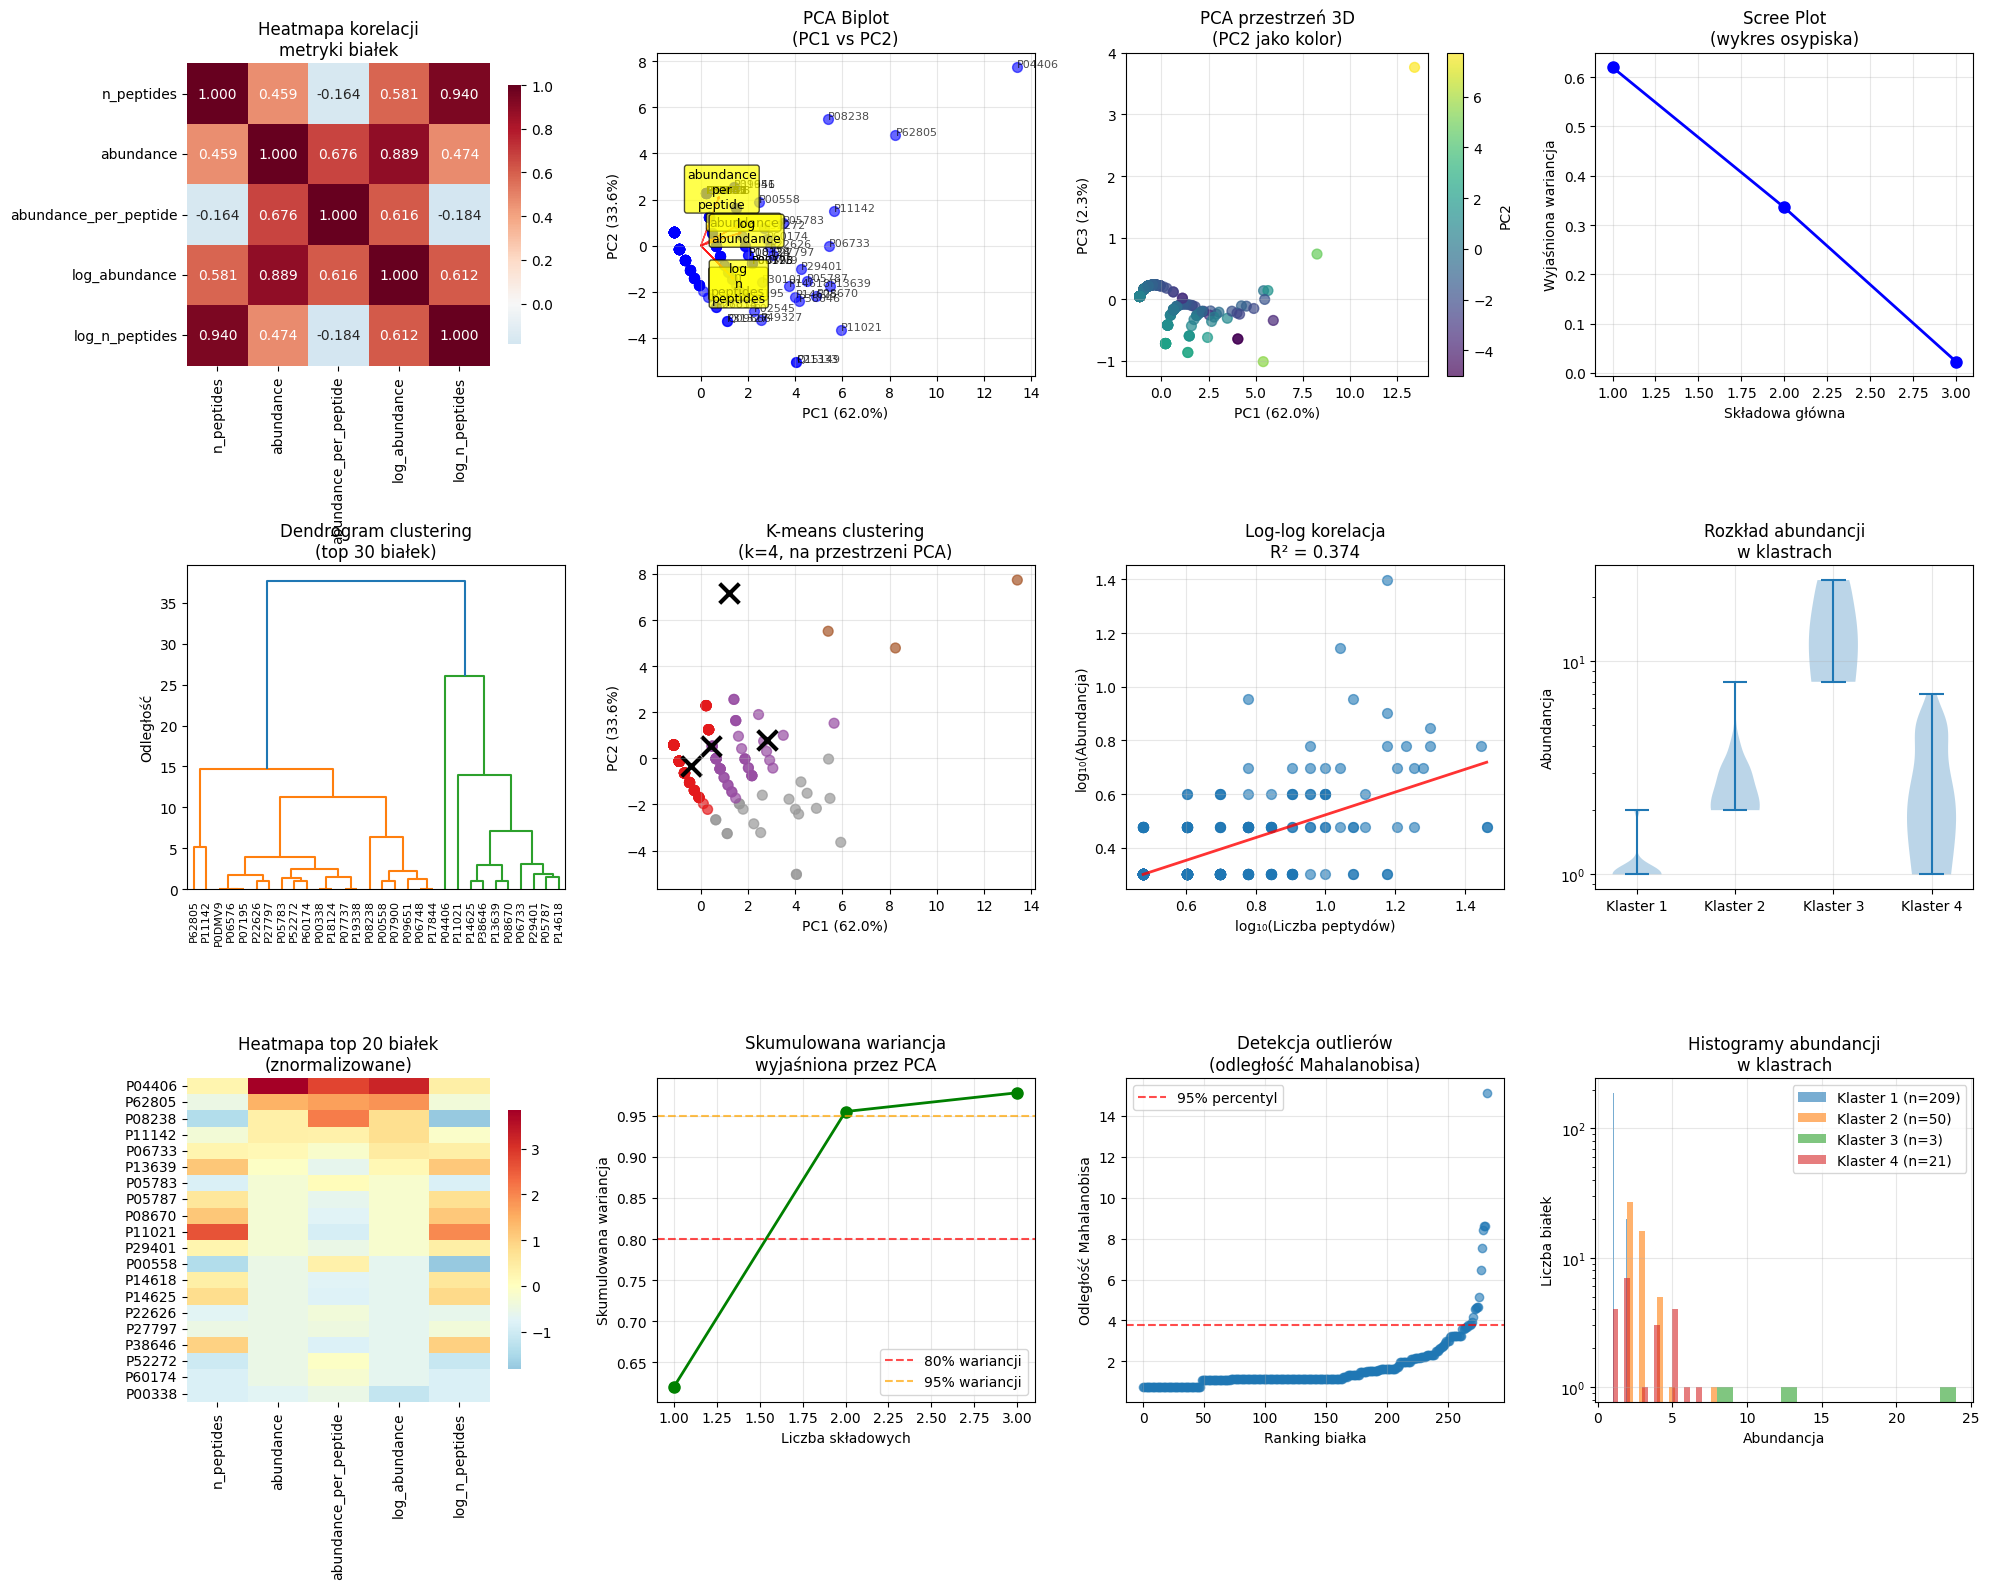

In [46]:
# WIZUALIZACJE ZAAWANSOWANYCH ANALIZ
if protein_matrix is not None:
    plt.figure(figsize=(20, 16))
    
    # 1. HEATMAPA KORELACJI
    plt.subplot(3, 4, 1)
    correlation_matrix = protein_matrix[features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
    plt.title('Heatmapa korelacji\nmetryki bia≈Çek', fontsize=12)
    
    # 2. PCA BIPLOT (PC1 vs PC2)
    plt.subplot(3, 4, 2)
    # Punkty
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, s=50, c='blue')
    
    # Dodanie nazw dla outlier√≥w
    for i, (x, y) in enumerate(zip(pca_df['PC1'], pca_df['PC2'])):
        if abs(x) > 2 or abs(y) > 2:  # Outlierzy
            plt.annotate(pca_df.index[i][:8], (x, y), fontsize=8, alpha=0.7)
    
    # Wektory ≈Çadunk√≥w
    scale_factor = 3
    for i, feature in enumerate(features):
        plt.arrow(0, 0, loadings.loc[feature, 'PC1']*scale_factor, 
                 loadings.loc[feature, 'PC2']*scale_factor,
                 head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
        plt.text(loadings.loc[feature, 'PC1']*scale_factor*1.2, 
                loadings.loc[feature, 'PC2']*scale_factor*1.2,
                feature.replace('_', '\n'), fontsize=9, ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.7))
    
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    plt.title('PCA Biplot\n(PC1 vs PC2)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # 3. PCA 3D (PC1 vs PC2 vs PC3) - projection na 2D
    plt.subplot(3, 4, 3)
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC3'], c=pca_df['PC2'], 
                         cmap='viridis', alpha=0.7, s=50)
    plt.colorbar(scatter, label='PC2')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%})')
    plt.title('PCA przestrze≈Ñ 3D\n(PC2 jako kolor)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # 4. SCREE PLOT (wykres osypiska)
    plt.subplot(3, 4, 4)
    plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
             pca.explained_variance_ratio_, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Sk≈Çadowa g≈Ç√≥wna')
    plt.ylabel('Wyja≈õniona wariancja')
    plt.title('Scree Plot\n(wykres osypiska)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # 5. CLUSTERING HIERARCHICZNY - DENDROGRAM
    plt.subplot(3, 4, 5)
    # Wyb√≥r top 30 bia≈Çek dla czytelno≈õci dendrogramu
    top_proteins = protein_matrix.nlargest(30, 'abundance')
    linkage_matrix = linkage(top_proteins[features], method='ward')
    dendrogram(linkage_matrix, labels=top_proteins.index, orientation='top', 
               leaf_rotation=90, leaf_font_size=8)
    plt.title('Dendrogram clustering\n(top 30 bia≈Çek)', fontsize=12)
    plt.ylabel('Odleg≈Ço≈õƒá')
    
    # 6. K-MEANS CLUSTERING
    plt.subplot(3, 4, 6)
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters, 
                         cmap='Set1', alpha=0.7, s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
               c='black', marker='x', s=200, linewidths=3)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    plt.title('K-means clustering\n(k=4, na przestrzeni PCA)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # 7. ABUNDANCE vs N_PEPTIDES (log-log plot)
    plt.subplot(3, 4, 7)
    plt.scatter(protein_matrix['log_n_peptides'], protein_matrix['log_abundance'], 
               alpha=0.6, s=50)
    
    # Regresja liniowa
    from sklearn.linear_model import LinearRegression
    X_reg = protein_matrix['log_n_peptides'].values.reshape(-1, 1)
    y_reg = protein_matrix['log_abundance'].values
    reg = LinearRegression().fit(X_reg, y_reg)
    x_line = np.linspace(X_reg.min(), X_reg.max(), 100)
    y_line = reg.predict(x_line.reshape(-1, 1))
    plt.plot(x_line, y_line, 'r-', linewidth=2, alpha=0.8)
    
    plt.xlabel('log‚ÇÅ‚ÇÄ(Liczba peptyd√≥w)')
    plt.ylabel('log‚ÇÅ‚ÇÄ(Abundancja)')
    plt.title(f'Log-log korelacja\nR¬≤ = {reg.score(X_reg, y_reg):.3f}', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # 8. VIOLIN PLOT - rozk≈Çady w klastrach
    plt.subplot(3, 4, 8)
    cluster_data = protein_matrix.copy()
    cluster_data['cluster'] = clusters
    
    data_for_violin = []
    labels_for_violin = []
    for cluster_id in range(4):
        cluster_abundances = cluster_data[cluster_data['cluster'] == cluster_id]['abundance']
        data_for_violin.append(cluster_abundances)
        labels_for_violin.append(f'Klaster {cluster_id+1}')
    
    plt.violinplot(data_for_violin, positions=range(1, 5))
    plt.xticks(range(1, 5), labels_for_violin)
    plt.ylabel('Abundancja')
    plt.title('Rozk≈Çad abundancji\nw klastrach', fontsize=12)
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    
    # 9. HEATMAPA TOP BIA≈ÅEK
    plt.subplot(3, 4, 9)
    top_20_proteins = protein_matrix.nlargest(20, 'abundance')
    top_20_scaled = StandardScaler().fit_transform(top_20_proteins[features])
    
    sns.heatmap(top_20_scaled, xticklabels=features, 
               yticklabels=[name[:10] for name in top_20_proteins.index],
               cmap='RdYlBu_r', center=0, cbar_kws={'shrink': 0.8})
    plt.title('Heatmapa top 20 bia≈Çek\n(znormalizowane)', fontsize=12)
    
    # 10. CUMULATIVE VARIANCE EXPLAINED
    plt.subplot(3, 4, 10)
    cumulative_var = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, len(cumulative_var)+1), cumulative_var, 'go-', linewidth=2, markersize=8)
    plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.7, label='80% wariancji')
    plt.axhline(y=0.95, color='orange', linestyle='--', alpha=0.7, label='95% wariancji')
    plt.xlabel('Liczba sk≈Çadowych')
    plt.ylabel('Skumulowana wariancja')
    plt.title('Skumulowana wariancja\nwyja≈õniona przez PCA', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 11. OUTLIER DETECTION (Mahalanobis distance)
    plt.subplot(3, 4, 11)
    from scipy.spatial.distance import mahalanobis
    
    cov_matrix = np.cov(X_scaled.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    mean_vector = np.mean(X_scaled, axis=0)
    
    mahal_distances = []
    for i in range(len(X_scaled)):
        mahal_dist = mahalanobis(X_scaled[i], mean_vector, inv_cov_matrix)
        mahal_distances.append(mahal_dist)
    
    plt.scatter(range(len(mahal_distances)), sorted(mahal_distances), alpha=0.6)
    threshold = np.percentile(mahal_distances, 95)
    plt.axhline(y=threshold, color='r', linestyle='--', alpha=0.7, label='95% percentyl')
    plt.xlabel('Ranking bia≈Çka')
    plt.ylabel('Odleg≈Ço≈õƒá Mahalanobisa')
    plt.title('Detekcja outlier√≥w\n(odleg≈Ço≈õƒá Mahalanobisa)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 12. ABUNDANCE DISTRIBUTION BY CLUSTER
    plt.subplot(3, 4, 12)
    cluster_data_plot = protein_matrix.copy()
    cluster_data_plot['cluster'] = clusters
    
    for cluster_id in range(4):
        cluster_subset = cluster_data_plot[cluster_data_plot['cluster'] == cluster_id]
        plt.hist(cluster_subset['abundance'], alpha=0.6, bins=15, 
                label=f'Klaster {cluster_id+1} (n={len(cluster_subset)})')
    
    plt.xlabel('Abundancja')
    plt.ylabel('Liczba bia≈Çek')
    plt.title('Histogramy abundancji\nw klastrach', fontsize=12)
    plt.legend()
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
else:
    print(" Brak danych do zaawansowanych wizualizacji")


In [ ]:
# ANALIZA RZECZYWISTYCH WYNIK√ìW IDENTYFIKACJI Z OPENMS WORKFLOW
print("="*60)
print("ANALIZA WYNIK√ìW IDENTYFIKACJI PEPTYD√ìW/BIA≈ÅEK")
print("="*60)

# Wczytanie danych z pliku wynikowego
results_file = "../results/TOPPAS_out/005-ProteinQuantifier-peptide_out/qExactive01819_profile.unknown"

try:
    # Wczytanie danych - plik ma format TSV z headerem
    df_results = pd.read_csv(results_file, sep='\t', comment='#')
    print(f"Pomy≈õlnie wczytano {len(df_results)} wierszy danych")
    print(f"Kolumny: {list(df_results.columns)}")
    
    # Podstawowe statystyki
    print(f"\n=== PODSTAWOWE STATYSTYKI ===")
    print(f"Liczba zidentyfikowanych peptyd√≥w: {len(df_results)}")
    print(f"Liczba unikalnych bia≈Çek: {df_results['protein'].nunique()}")
    print(f"≈örednia abundancja: {df_results['abundance'].mean():.2f}")
    print(f"Zakres abundancji: {df_results['abundance'].min():.1f} - {df_results['abundance'].max():.1f}")
    
    # PodglƒÖd najwa≈ºniejszych wynik√≥w
    print(f"\n=== TOP 10 PEPTYD√ìW (wed≈Çug abundancji) ===")
    top_peptides = df_results.nlargest(10, 'abundance')[['peptide', 'protein', 'abundance']]
    for i, (_, row) in enumerate(top_peptides.iterrows(), 1):
        protein_short = row['protein'].split('|')[1] if '|' in row['protein'] else row['protein'][:15]
        print(f"{i:2d}. {row['peptide']:15} | {protein_short:15} | {row['abundance']:5.1f}")
        
except Exception as e:
    print(f" B≈ÇƒÖd wczytywania pliku: {e}")
    df_results = None


ANALIZA WYNIK√ìW IDENTYFIKACJI PEPTYD√ìW/BIA≈ÅEK
Pomy≈õlnie wczytano 4082 wierszy danych
Kolumny: ['peptide', 'protein', 'n_proteins', 'charge', 'abundance', 'fraction']

=== PODSTAWOWE STATYSTYKI ===
Liczba zidentyfikowanych peptyd√≥w: 4082
Liczba unikalnych bia≈Çek: 2235
≈örednia abundancja: 1.39
Zakres abundancji: 1.0 - 45.0

=== TOP 10 PEPTYD√ìW (wed≈Çug abundancji) ===
 1. VFLENVIR        | P62805          |  45.0
 2. LISWYDNEFGYSNR  | P04406          |  38.0
 3. LLLPGELAK       | O60814          |  28.0
 4. IWHHTFYNELR     | A5A3E0          |  22.0
 5. ATRRFSWK        | C4XFA6          |  20.0
 6. YISPDQLADLYK    | P06733          |  20.0
 7. HQGVM(Oxidation)VGM(Oxidation)GQK | P60709          |  16.0
 8. YPIEHGIITNWDDM(Oxidation)EK | P62736          |  16.0
 9. VVDLM(Oxidation)AHM(Oxidation)ASKE | P04406          |  15.0
10. ISGLIYEETR      | P62805          |  13.0


In [35]:
# Podsumowanie przetwarzania
print("=== PODSUMOWANIE REDUKCJI SZUMU I NORMALIZACJI ===")
print(f"Dane wej≈õciowe:")
print(f"-  Liczba pik√≥w: {len(mz_values)}")
print(f"-  Zakres m/z: {min(mz_values):.2f} - {max(mz_values):.2f}")
print(f"-  Zakres intensywno≈õci: {min(intensity_values):.2e} - {max(intensity_values):.2e}")

print(f"\nParametry filtracji:")
print(f"-  Pr√≥g filtracji: {threshold:.2e} ({threshold/max(intensity_values)*100:.1f}% max)")
print(f"-  Metoda: usuniƒôcie pik√≥w poni≈ºej 75. percentyla")

print(f"\nDane po przetworzeniu:")
print(f"-  Liczba pik√≥w: {len(mz_filtered)} (redukcja: {100*(1-len(mz_filtered)/len(mz_values)):.1f}%)")
print(f"-  Zakres m/z: {min(mz_filtered):.2f} - {max(mz_filtered):.2f}")
print(f"-  Zakres intensywno≈õci: {min(intensity_normalized):.1f}% - {max(intensity_normalized):.1f}%")

print(f"\nNormalizacja:")
print(f"-  Metoda: relative intensity (% najintensywniejszego piku)")
print(f"-  Najintensywniejszy pik: m/z {mz_filtered[np.argmax(intensity_normalized)]:.2f}")


=== PODSUMOWANIE REDUKCJI SZUMU I NORMALIZACJI ===
Dane wej≈õciowe:
-  Liczba pik√≥w: 296
-  Zakres m/z: 297.02 - 1515.16
-  Zakres intensywno≈õci: 0.00e+00 - 8.39e+03

Parametry filtracji:
-  Pr√≥g filtracji: 4.52e+03 (53.9% max)
-  Metoda: usuniƒôcie pik√≥w poni≈ºej 75. percentyla

Dane po przetworzeniu:
-  Liczba pik√≥w: 74 (redukcja: 75.0%)
-  Zakres m/z: 329.03 - 1334.09
-  Zakres intensywno≈õci: 54.2% - 100.0%

Normalizacja:
-  Metoda: relative intensity (% najintensywniejszego piku)
-  Najintensywniejszy pik: m/z 1334.06


In [36]:
# POPRAWKA: Lepsze podej≈õcie do filtracji danych profile mode
# Dane profile mode wymagajƒÖ innego podej≈õcia ni≈º centroid

# 1. Smooth/denoise dla danych profile
from scipy import signal
from scipy.ndimage import gaussian_filter1d

# Wyg≈Çadzenie sygna≈Çu (usuniƒôcie szumu instrumentalnego)
intensity_smoothed = gaussian_filter1d(intensity_values, sigma=1.0)

# 2. Inteligentna filtracja oparta na SNR (Signal-to-Noise Ratio)
# Obliczenie szumu jako odchylenie standardowe w regionach bez pik√≥w
noise_level = np.std(intensity_smoothed[intensity_smoothed < np.percentile(intensity_smoothed, 10)])
signal_threshold = noise_level * 3  # SNR = 3

print(f"Poziom szumu: {noise_level:.2e}")
print(f"Pr√≥g sygna≈Çu (3√ószum): {signal_threshold:.2e}")

# 3. Filtracja oparta na lokalnych maksimach
# Identyfikacja rzeczywistych pik√≥w (nie tylko punkt√≥w powy≈ºej progu)
peaks, properties = signal.find_peaks(intensity_smoothed, 
                                     height=signal_threshold,
                                     distance=5,  # minimalna odleg≈Ço≈õƒá miƒôdzy pikami
                                     prominence=signal_threshold/2)

print(f"Znaleziono {len(peaks)} rzeczywistych pik√≥w")


Poziom szumu: 1.64e-01
Pr√≥g sygna≈Çu (3√ószum): 4.91e-01
Znaleziono 22 rzeczywistych pik√≥w


In [37]:
# Przygotowanie danych do prawid≈Çowej wizualizacji
# 1. Wyg≈Çadzone spektrum (ca≈Çy sygna≈Ç)
mz_smooth = mz_values
intensity_smooth_norm = (intensity_smoothed / np.max(intensity_smoothed)) * 100

# 2. Zidentyfikowane piki (tylko lokalne maksima)
mz_peaks = mz_values[peaks]
intensity_peaks = intensity_smoothed[peaks]
intensity_peaks_norm = (intensity_peaks / np.max(intensity_smoothed)) * 100

# Top 10 najintensywniejszych pik√≥w
top_peaks_idx = np.argsort(intensity_peaks_norm)[-10:][::-1]

print("Top 10 najintensywniejszych pik√≥w (poprawiona analiza):")
for i, idx in enumerate(top_peaks_idx, 1):
    print(f"{i:2d}. m/z: {mz_peaks[idx]:7.2f}, intensywno≈õƒá: {intensity_peaks_norm[idx]:5.1f}%")


Top 10 najintensywniejszych pik√≥w (poprawiona analiza):
 1. m/z: 1334.06, intensywno≈õƒá: 100.0%
 2. m/z:  725.55, intensywno≈õƒá:  97.6%
 3. m/z: 1062.70, intensywno≈õƒá:  97.5%
 4. m/z:  774.07, intensywno≈õƒá:  91.9%
 5. m/z: 1029.35, intensywno≈õƒá:  90.9%
 6. m/z:  837.42, intensywno≈õƒá:  89.5%
 7. m/z:  799.12, intensywno≈õƒá:  88.3%
 8. m/z: 1097.94, intensywno≈õƒá:  86.3%
 9. m/z:  687.70, intensywno≈õƒá:  85.5%
10. m/z:  515.38, intensywno≈õƒá:  83.1%


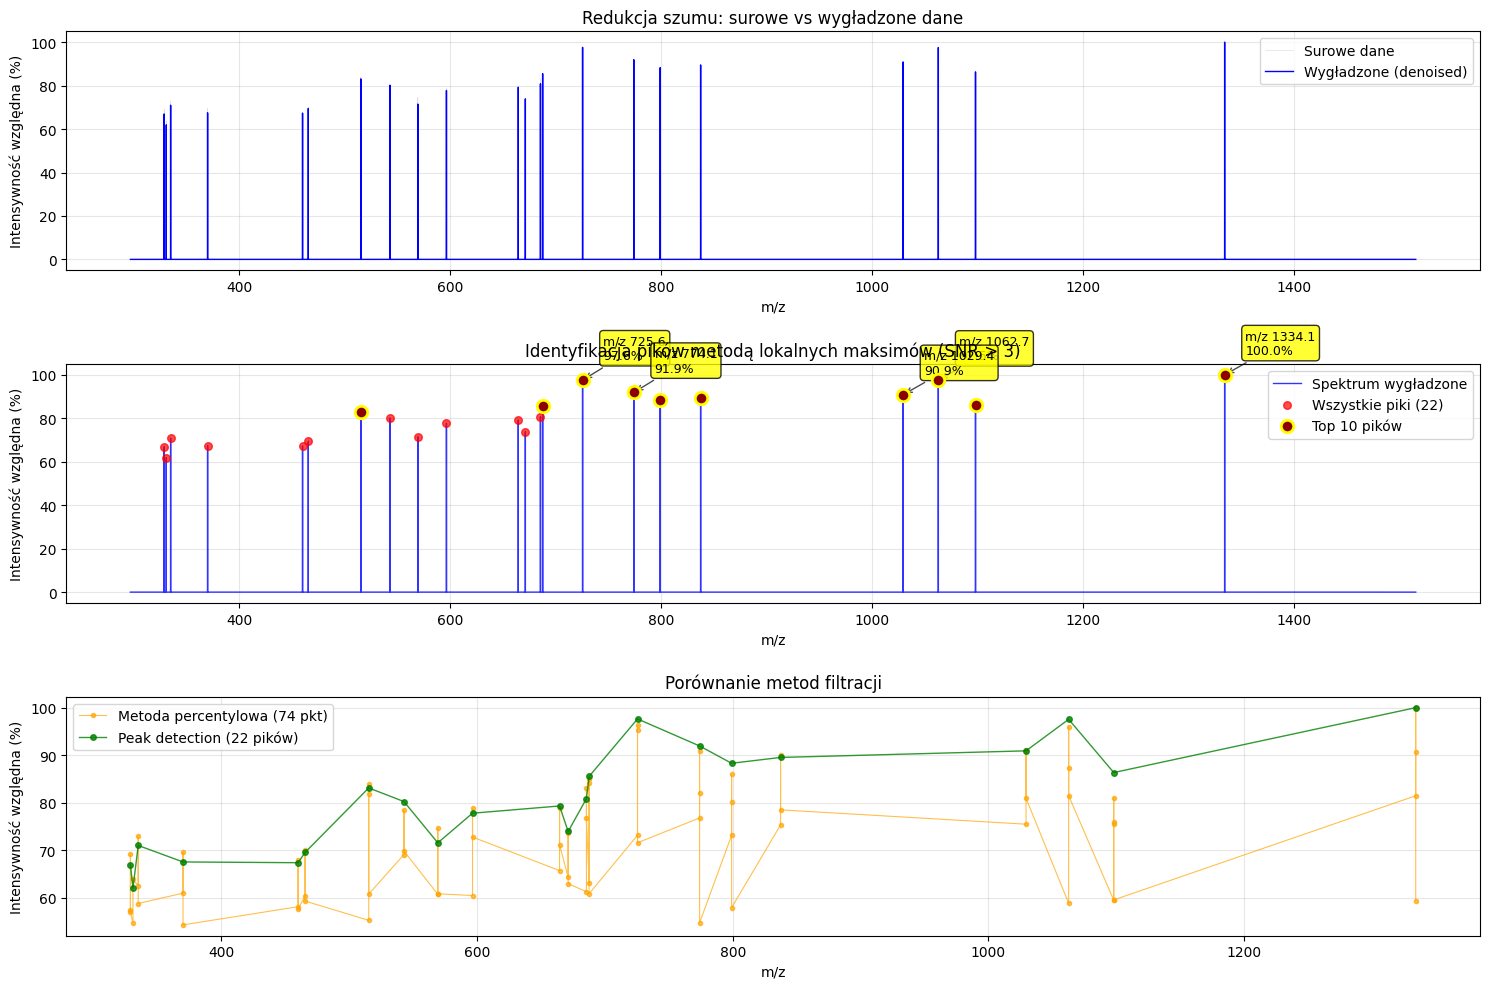

In [38]:
# POPRAWIONA WIZUALIZACJA - odpowiednia dla danych profile mode
plt.figure(figsize=(15, 10))

# 1. Spektrum surowe vs wyg≈Çadzone
plt.subplot(3, 1, 1)
plt.plot(mz_values, intensity_values/np.max(intensity_values)*100, 
         linewidth=0.5, color='lightgray', alpha=0.7, label='Surowe dane')
plt.plot(mz_smooth, intensity_smooth_norm, 
         linewidth=1.0, color='blue', label='Wyg≈Çadzone (denoised)')
plt.xlabel('m/z')
plt.ylabel('Intensywno≈õƒá wzglƒôdna (%)')
plt.title('Redukcja szumu: surowe vs wyg≈Çadzone dane')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Identyfikacja pik√≥w na wyg≈Çadzonym spektrum
plt.subplot(3, 1, 2)
plt.plot(mz_smooth, intensity_smooth_norm, linewidth=1.0, color='blue', alpha=0.8)

# Zaznaczenie wszystkich zidentyfikowanych pik√≥w
plt.scatter(mz_peaks, intensity_peaks_norm, color='red', s=30, zorder=5, alpha=0.7)

# Wyr√≥≈ºnienie top 10 pik√≥w
plt.scatter(mz_peaks[top_peaks_idx], intensity_peaks_norm[top_peaks_idx], 
           color='darkred', s=80, zorder=6, marker='o', 
           edgecolor='yellow', linewidth=2)

# Adnotacje dla top 5 pik√≥w
for i, idx in enumerate(top_peaks_idx[:5]):
    plt.annotate(f'm/z {mz_peaks[idx]:.1f}\n{intensity_peaks_norm[idx]:.1f}%', 
                xy=(mz_peaks[idx], intensity_peaks_norm[idx]),
                xytext=(15, 15), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8),
                fontsize=9, ha='left',
                arrowprops=dict(arrowstyle='->', color='black', alpha=0.7))

plt.xlabel('m/z')
plt.ylabel('Intensywno≈õƒá wzglƒôdna (%)')
plt.title('Identyfikacja pik√≥w metodƒÖ lokalnych maksim√≥w (SNR > 3)')
plt.legend(['Spektrum wyg≈Çadzone', f'Wszystkie piki ({len(peaks)})', 'Top 10 pik√≥w'], 
          loc='upper right')
plt.grid(True, alpha=0.3)

# 3. Por√≥wnanie metod filtracji
plt.subplot(3, 1, 3)
# Stara metoda (percentylowa)
mask_old = intensity_values >= threshold
plt.plot(mz_values[mask_old], (intensity_values[mask_old]/np.max(intensity_values))*100, 
         'o-', markersize=3, linewidth=0.8, color='orange', alpha=0.7, 
         label=f'Metoda percentylowa ({len(mz_values[mask_old])} pkt)')

# Nowa metoda (peak detection)
plt.plot(mz_peaks, intensity_peaks_norm, 'o-', markersize=4, linewidth=1.0, 
         color='green', alpha=0.8, label=f'Peak detection ({len(peaks)} pik√≥w)')

plt.xlabel('m/z')
plt.ylabel('Intensywno≈õƒá wzglƒôdna (%)')
plt.title('Por√≥wnanie metod filtracji')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [39]:
# Przygotowanie do identyfikacji peptyd√≥w/bia≈Çek
print("=== PIPELINE IDENTYFIKACJI PEPTYD√ìW/BIA≈ÅEK ===")
print("\n1. DLACZEGO U≈ªYWAƒÜ SUROWYCH DANYCH:")
print("   ‚Ä¢ PeakPickerHiRes ma zaawansowane algorytmy centroidowania")
print("   ‚Ä¢ Zachowuje precyzyjne masy i intensywno≈õci")
print("   ‚Ä¢ Optymalizowany do identyfikacji peptyd√≥w")
print("   ‚Ä¢ Nasze przetwarzanie by≈Ço do analizy/wizualizacji")

print("\n2. STANDARDOWY PIPELINE OpenMS:")
print("   Profile mode ‚Üí PeakPickerHiRes ‚Üí MSGFPlusAdapter ‚Üí ProteinQuantifier")

print("\n3. IMPLEMENTACJA W PYTHONIE:")
print("   Mo≈ºna wywo≈Çaƒá narzƒôdzia OpenMS z poziomu Pythona")

# Sprawdzenie ≈õcie≈ºek plik√≥w
import os
data_path = "../data/"
mzml_file = os.path.join(data_path, "qExactive01819_profile.mzml")
fasta_file = os.path.join(data_path, "Human_database_including_decoys_(cRAP_and_Mycoplasma_added).fasta")

print(f"\n4. PLIKI DO ANALIZY:")
print(f"   ‚Ä¢ mzML: {os.path.exists(mzml_file)} - {mzml_file}")
print(f"   ‚Ä¢ FASTA: {os.path.exists(fasta_file)} - {fasta_file}")

if os.path.exists(mzml_file) and os.path.exists(fasta_file):
    print("\n‚úÖ Wszystkie wymagane pliki sƒÖ dostƒôpne")
else:
    print("\n‚ùå Brakuje niekt√≥rych plik√≥w")


=== PIPELINE IDENTYFIKACJI PEPTYD√ìW/BIA≈ÅEK ===

1. DLACZEGO U≈ªYWAƒÜ SUROWYCH DANYCH:
   ‚Ä¢ PeakPickerHiRes ma zaawansowane algorytmy centroidowania
   ‚Ä¢ Zachowuje precyzyjne masy i intensywno≈õci
   ‚Ä¢ Optymalizowany do identyfikacji peptyd√≥w
   ‚Ä¢ Nasze przetwarzanie by≈Ço do analizy/wizualizacji

2. STANDARDOWY PIPELINE OpenMS:
   Profile mode ‚Üí PeakPickerHiRes ‚Üí MSGFPlusAdapter ‚Üí ProteinQuantifier

3. IMPLEMENTACJA W PYTHONIE:
   Mo≈ºna wywo≈Çaƒá narzƒôdzia OpenMS z poziomu Pythona

4. PLIKI DO ANALIZY:
   ‚Ä¢ mzML: True - ../data/qExactive01819_profile.mzml
   ‚Ä¢ FASTA: True - ../data/Human_database_including_decoys_(cRAP_and_Mycoplasma_added).fasta

‚úÖ Wszystkie wymagane pliki sƒÖ dostƒôpne


In [40]:
# Implementacja pipeline'u OpenMS w Pythonie
import subprocess
import pandas as pd

def run_openms_pipeline():
    """
    Wykonuje pipeline identyfikacji peptyd√≥w u≈ºywajƒÖc narzƒôdzi OpenMS
    """
    
    # ≈öcie≈ºki plik√≥w
    input_mzml = "../data/qExactive01819_profile.mzml"
    centroided_mzml = "../results/qExactive01819_centroided.mzML"
    database_fasta = "../data/Human_database_including_decoys_(cRAP_and_Mycoplasma_added).fasta"
    identification_idxml = "../results/qExactive01819_identification.idXML"
    quantification_csv = "../results/qExactive01819_proteins.csv"
    
    print("WYKONYWANIE PIPELINE'U OPENMS:")
    print("=" * 50)
    
    # Krok 1: PeakPickerHiRes (Profile ‚Üí Centroid)
    print("1. Peak picking (Profile ‚Üí Centroid mode)...")
    peakpicker_cmd = [
        "PeakPickerHiRes",
        "-in", input_mzml,
        "-out", centroided_mzml
    ]
    
    # Krok 2: MSGFPlusAdapter (Identyfikacja peptyd√≥w)
    print("2. Identyfikacja peptyd√≥w (MSGF+)...")
    msgf_cmd = [
        "MSGFPlusAdapter", 
        "-in", centroided_mzml,
        "-database", database_fasta,
        "-out", identification_idxml,
        "-executable", "MSGFPlus.jar"
    ]
    
    # Krok 3: ProteinQuantifier (Kwantyfikacja bia≈Çek)
    print("3. Kwantyfikacja bia≈Çek...")
    quantifier_cmd = [
        "ProteinQuantifier",
        "-in", identification_idxml,
        "-out", quantification_csv
    ]
    
    # Wy≈õwietlenie komend (bez wykonania - wymaga instalacji OpenMS)
    print("\nKOMENDY DO WYKONANIA:")
    print(" ".join(peakpicker_cmd))
    print(" ".join(msgf_cmd))
    print(" ".join(quantifier_cmd))
    
    return peakpicker_cmd, msgf_cmd, quantifier_cmd

# Przygotowanie komend
peakpicker_cmd, msgf_cmd, quantifier_cmd = run_openms_pipeline()


WYKONYWANIE PIPELINE'U OPENMS:
1. Peak picking (Profile ‚Üí Centroid mode)...
2. Identyfikacja peptyd√≥w (MSGF+)...
3. Kwantyfikacja bia≈Çek...

KOMENDY DO WYKONANIA:
PeakPickerHiRes -in ../data/qExactive01819_profile.mzml -out ../results/qExactive01819_centroided.mzML
MSGFPlusAdapter -in ../results/qExactive01819_centroided.mzML -database ../data/Human_database_including_decoys_(cRAP_and_Mycoplasma_added).fasta -out ../results/qExactive01819_identification.idXML -executable MSGFPlus.jar
ProteinQuantifier -in ../results/qExactive01819_identification.idXML -out ../results/qExactive01819_proteins.csv
